Lets see which one is the most crowed station. 

In [100]:
import numpy as np 
import pandas as pd
import datetime

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("Data/trip.csv")
df.start_date = pd.to_datetime(df.start_date, format='%m/%d/%Y %H:%M') 
df.end_date = pd.to_datetime(df.end_date, format='%m/%d/%Y %H:%M')


Por resultados anteriores, limpamos el set de datos con viajes mayores a 3 min y menores a 370

In [101]:
df.duration /= 60
df = df[df.duration <= 370]
df = df[df.duration >3]
#Ver el analisis de flor sobre los nombres mal escritos de las estaciones " post at kearny"

In [102]:
df.head(3)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
35,5088,3.050000,2013-08-29 22:08:00,Market at 4th,76,2013-08-29 22:12:00,Post at Kearney,47,309,Subscriber,94115
36,4721,3.066667,2013-08-29 16:27:00,Market at 10th,67,2013-08-29 16:30:00,South Van Ness at Market,66,416,Subscriber,94107
37,4636,3.100000,2013-08-29 15:11:00,2nd at Folsom,62,2013-08-29 15:14:00,2nd at Townsend,61,366,Subscriber,94109


Cuál es la estación de donde salieron más viajes ? Rta. ID: 70 - buscar nombre

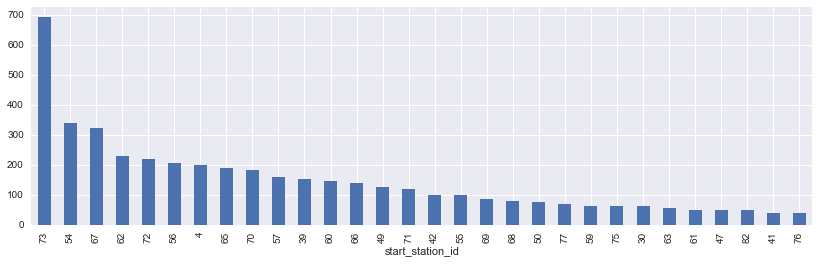

In [112]:
prueba = df
prueba['day'] =  pd.to_datetime(df['start_date']).dt.day
prueba = prueba[prueba.hour > 1]
prueba = prueba[prueba.hour < 6 ]
prueba.groupby('start_station_id').count()['id'].sort_values(ascending=False)[0:30].plot(kind='bar',figsize=(14,4))

Cuál es la estación a la que llegaron más viajes? Rta. ID: 70 - buscar nombre

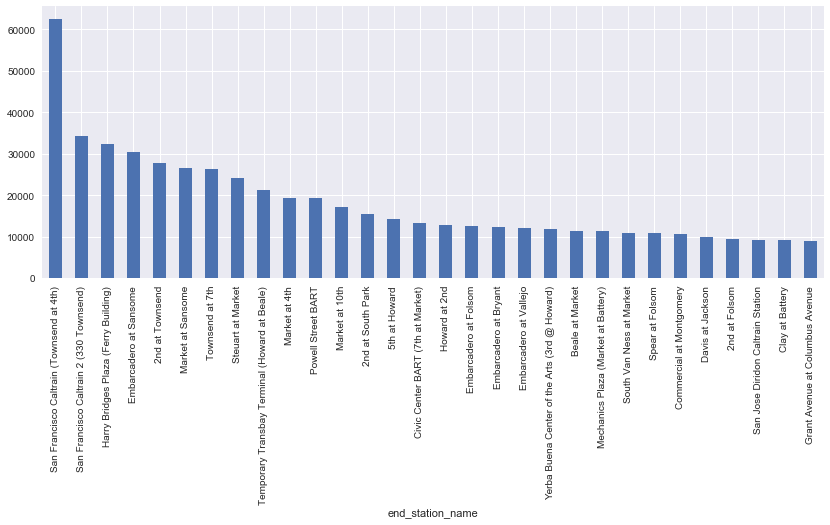

In [22]:
df.groupby('end_station_name').count()['id'].sort_values(ascending=False)[0:30].plot(kind='bar',figsize=(14,5))

Analicemos el tráfico de las estaciones por mes y día de la semana.

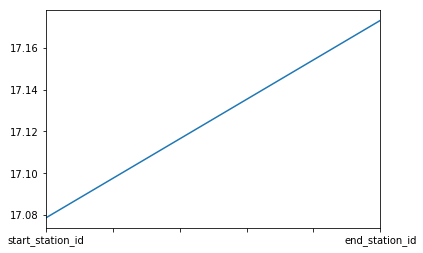

In [6]:
df.loc[:,['start_station_id','end_station_id']].std().plot()

In [7]:
#from_station = df['start_station_id'] == 70
          

#call_station_san_francisco = []


#for end_station in df.end_station_id.unique():
 #   to_station = df['end_station_id'] == end_station
  #  from_to_station = df[from_station & to_station]
   # from_to_station = from_to_station.loc[:,['start_station_id','end_station_id']]
    #call_station_san_francisco[end_station] = from_to_station.groupby('start_station_id').count()  
                
            
        # call_station_san_francisco[end_station] = from_to_station.count()
#from_to_station.head() 



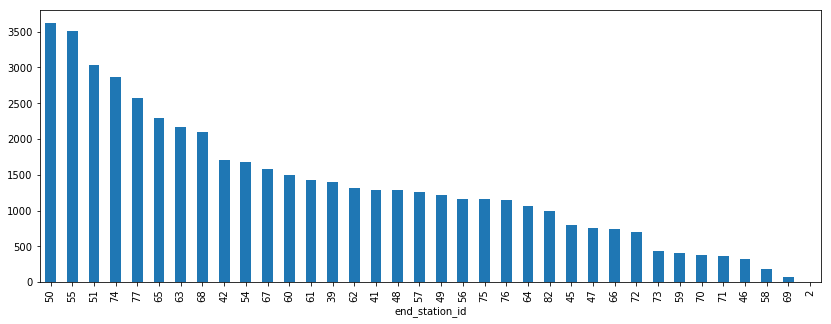

In [8]:
#Las estaciones donde más se dirigieron los viajes desde la "San francisco call train 4th"
from_to = df[df['start_station_id'] == 70].groupby('end_station_id').size()
from_to.sort_values(ascending=False)[0:72].plot(kind='bar',figsize=(14,5))

In [9]:
from_to = df[df['end_station_id'] == 2].groupby('start_station_id').size()
#from_to.sort_values(ascending=False)[0:72].plot(kind='bar',figsize=(14,5))
from_to.sort_values(ascending=False)

start_station_id
4     2262
6     1172
11     806
10     715
7      693
5      662
13     645
84     545
9      438
16     409
3      378
8      261
2      133
12     125
14      23
80      17
28       1
70       1
dtype: int64

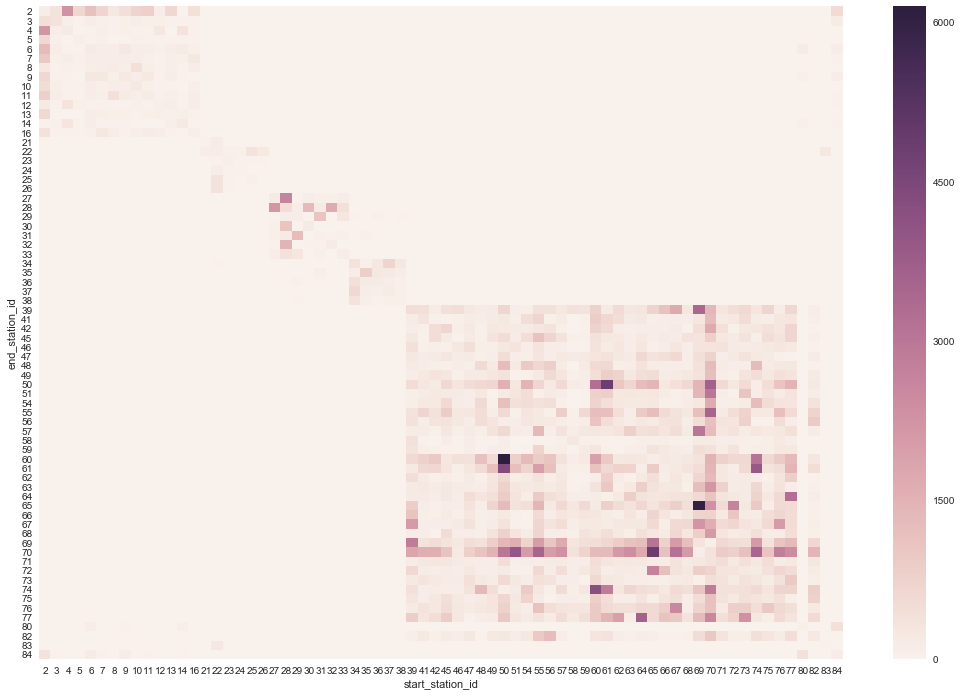

In [83]:
import seaborn as sns
#prueba = df.loc[:,['start_station_id','end_station_id']]
#from_to = df.groupby(['start_station_id','end_station_id']).agg([np.size,np.mean,np.std])
#from_to
#result = pd.crosstab(df['start_station_id'],df['end_station_id'])
#fig,ax = plt.subplots(figsize=(20,20))
#sns.heatmap(result,fmt ="g",cmap = 'viridis', linewidths =.2)
#plt.show(
#filtrar antes desde el 38 en adelante
#prueba = df[(df.start_station_id < 20 )]
#prueba = prueba[(prueba.end_station_id <20 )]

#prueba = pd.crosstab(prueba['end_station_id'],prueba['start_station_id'])
#prueba.head(3)

fig, ax = plt.subplots(figsize=(18,12))         # Sample figsize in inches
#prueba = df

sns.heatmap(pd.crosstab(df['end_station_id'],df['start_station_id']));


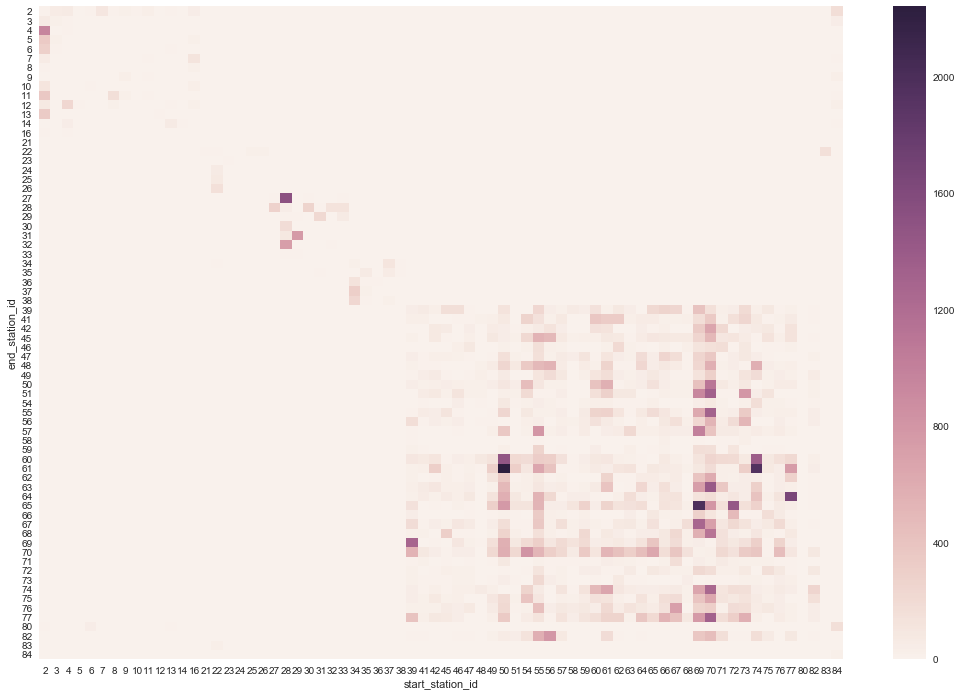

In [97]:
#ahora veo la relacion entre estaciones pero por una franja horaria.
#prueba = df[(df.start_station_id < 20 )]
#prueba = prueba[(prueba.end_station_id <20 )]
prueba = df
prueba['hour'] =  pd.to_datetime(df['start_date']).dt.hour
prueba = prueba[prueba.hour > 7]
prueba = prueba[prueba.hour < 10]

fig, ax = plt.subplots(figsize=(18,12))         # Sample figsize in inches
#prueba = df

sns.heatmap(pd.crosstab(prueba['end_station_id'],prueba['start_station_id']));


